In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime
import inspect
import matplotlib as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import sympy as sym

In [2]:
repo_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_url = repo_url + 'time_series_covid19_confirmed_global.csv'
deaths_url = repo_url + 'time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,782
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,30


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,68
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,453
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,43
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [6]:
data_argentina_confirmed = data_confirmed[data_confirmed['Country/Region'] == 'Argentina']
data_argentina_deaths = data_deaths[data_deaths['Country/Region'] == 'Argentina']

In [7]:
data_argentina_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3144,3435,3607,3780,3892,4003,4127,4285,4428,4532


In [8]:
data_argentina_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,152,165,176,185,192,197,207,214,218,225


In [9]:
del data_argentina_confirmed['Lat']
del data_argentina_confirmed['Long']
del data_argentina_confirmed['Province/State']

del data_argentina_deaths['Lat']
del data_argentina_deaths['Long']
del data_argentina_deaths['Province/State']

In [10]:
data_argentina_confirmed.rename(columns={'Country/Region':'Date'}, inplace=True)
data_argentina_deaths.rename(columns={'Country/Region':'Date'}, inplace=True)

In [11]:
data_argentina_confirmed = data_argentina_confirmed.T
data_argentina_deaths = data_argentina_deaths.T

In [12]:
data_argentina_confirmed.head()

,6
Date,Argentina
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0


In [13]:
data_argentina_confirmed.columns = data_argentina_confirmed.iloc[0]
data_argentina_deaths.columns = data_argentina_deaths.iloc[0]

In [14]:
data_argentina_confirmed = data_argentina_confirmed.iloc[1:]
data_argentina_deaths = data_argentina_deaths.iloc[1:]

In [15]:
data_argentina_confirmed.rename(columns={'Argentina':'Total'}, inplace=True)
data_argentina_deaths.rename(columns={'Argentina':'Total'}, inplace=True)

In [16]:
data_argentina_confirmed.index = pd.to_datetime(data_argentina_confirmed.index.astype(str), format='%m/%d/%y')
data_argentina_deaths.index = pd.to_datetime(data_argentina_deaths.index.astype(str), format='%m/%d/%y')

In [17]:
data_argentina_confirmed.drop(data_argentina_confirmed[data_argentina_confirmed.index < '2020-03-01'].index, inplace=True)
data_argentina_deaths.drop(data_argentina_deaths[data_argentina_deaths.index < '2020-03-01'].index, inplace=True)

In [18]:
data_argentina_confirmed.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,1


In [19]:
def completeWithMean(column):
    return (column.shift() + column.shift(-1)) / 2

duplicated = data_argentina_confirmed.duplicated('Total')
data_argentina_confirmed.loc[duplicated, ['Total']] = np.NaN

data_argentina_confirmed.Total = np.where(data_argentina_confirmed['Total'].isnull(),
         completeWithMean(data_argentina_confirmed['Total']),
         data_argentina_confirmed['Total'])

data_argentina_confirmed.fillna(method='pad', inplace=True)
data_argentina_confirmed.Total = data_argentina_confirmed.Total.round().astype(int)

In [20]:
data_argentina_confirmed['New'] = (data_argentina_confirmed.Total - data_argentina_confirmed.Total.shift(1)).fillna(0).astype(int)

In [21]:
data_argentina_deaths.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [22]:
data_argentina_deaths['New'] = (data_argentina_deaths.Total - data_argentina_deaths.Total.shift(1)).fillna(0)

In [23]:
data_argentina = pd.merge(data_argentina_confirmed, data_argentina_deaths
                          , left_index=True, right_index=True
                          , suffixes=('ConfirmedCases', 'DeathCases'))

In [24]:
data_argentina

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases
2020-03-01,0,0,0,0
2020-03-02,0,0,0,0
2020-03-03,1,1,0,0
2020-03-04,1,0,0,0
2020-03-05,1,0,0,0
...,...,...,...,...
2020-04-27,4003,111,197,5
2020-04-28,4127,124,207,10
2020-04-29,4285,158,214,7
2020-04-30,4428,143,218,4


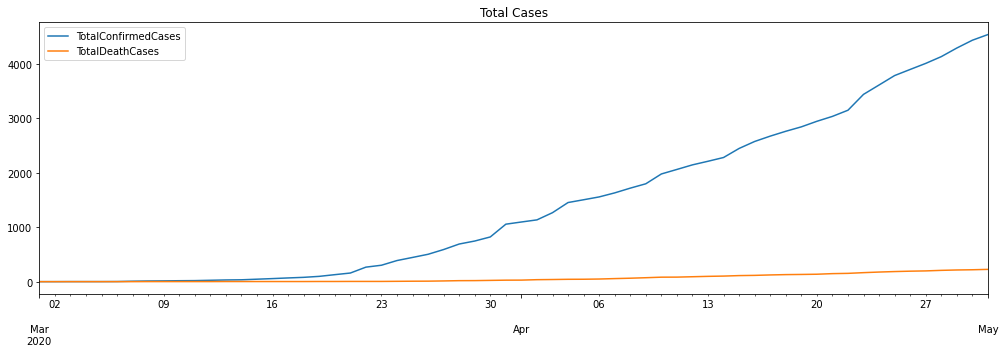

In [25]:
data_argentina.TotalConfirmedCases.plot(figsize=(17, 5), title="Total Cases", legend=True)
data_argentina.TotalDeathCases.plot(figsize=(17, 5), legend=True)

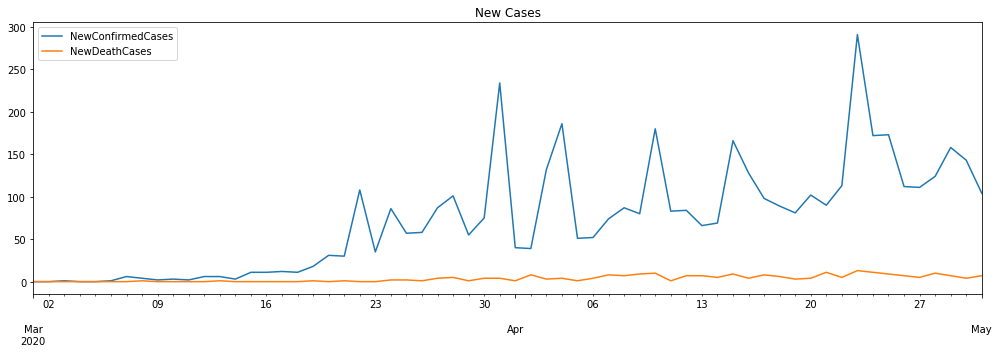

In [26]:
data_argentina.NewConfirmedCases.plot(figsize=(17, 5), title="New Cases", legend=True)
data_argentina.NewDeathCases.plot(figsize=(17, 5), legend=True)

In [27]:
data_argentina_confirmed

Date,Total,New
2020-03-01,0,0
2020-03-02,0,0
2020-03-03,1,1
2020-03-04,1,0
2020-03-05,1,0
...,...,...
2020-04-27,4003,111
2020-04-28,4127,124
2020-04-29,4285,158
2020-04-30,4428,143


In [28]:
data_argentina['num_id'] = np.arange(len(data_argentina) + 1)[1:]
#data_argentina = data_argentina.head(45)
data_argentina.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-01,0,0,0,0,1
2020-03-02,0,0,0,0,2
2020-03-03,1,1,0,0,3
2020-03-04,1,0,0,0,4
2020-03-05,1,0,0,0,5


In [29]:
data_argentina.tail()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-04-27,4003,111,197,5,58
2020-04-28,4127,124,207,10,59
2020-04-29,4285,158,214,7,60
2020-04-30,4428,143,218,4,61
2020-05-01,4532,104,225,7,62


In [30]:
predicted_days = 30
firstPredictionDay = data_argentina.index[-1] + datetime.timedelta(days = 1)

In [31]:
# testing only (remove last row to check results)
#data_argentina.drop(data_argentina.tail(1).index,inplace=True)

In [32]:
class Models:    
    def cuadratic_model(x, a, b, c):
        return (a*x**2 + b*x +c)

    def cubic_model(x, a, b, c, d):
        return (a*x**3 + b*x**2 +c*x + d)
    
    def sin_model(x, a, b):
        _,r = divmod(x, data_argentina.num_id.max())
        return a * pow(np.sin(r / b), 2)
    
    def gauss_function(x, a, x0, sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [33]:
def formatPrediction(firstPredictionDay, day, prediction):
    formatedDate = str(firstPredictionDay + datetime.timedelta(days = day))[0:10]
    formatedPrediction = str(int(prediction))
    return "|" + formatedDate + " | " + formatedPrediction + "|"

def printPrediction(model, popt, x, y):
    firstPredictionDayId = x.max() + 1
    print("--- Predictions ---")
    for day in range (0, predicted_days):
        predictionId = firstPredictionDayId + day
        predictionValue = model(predictionId, *popt)
        print(formatPrediction(firstPredictionDay, day, predictionValue))
    print("-------------------")

In [34]:
def printFuncionParameters(model, popt):
        print('\n', model.__name__)
        args = inspect.getfullargspec(model).args[1:]
        for arg, value in zip(args, popt):
            print( arg, " = ", value)

def plotPrediction(model, popt, x, y):
    plt.pyplot.figure()
    try:
        xs = sym.Symbol('\lambda')    
        tex = sym.latex(model(xs,*popt)).replace('$', '')
        plt.pyplot.title(r'$f(\lambda)= %s$' %(tex),fontsize=12)
    except:
        printFuncionParameters(model, popt)

    plt.pyplot.plot(x, model(x, *popt))
    plt.pyplot.plot(x, y, 'ro')
    plt.pyplot.show()

In [35]:
def predictData(model, x, y):
    popt, _ = curve_fit(model, x, y)
    printPrediction(model, popt, x, y)
    plotPrediction(model, popt, x, y)
    return popt

cuadratic_model
--- Predictions ---
|2020-05-02 | 4680|
|2020-05-03 | 4828|
|2020-05-04 | 4979|
|2020-05-05 | 5131|
|2020-05-06 | 5285|
|2020-05-07 | 5442|
|2020-05-08 | 5600|
|2020-05-09 | 5760|
|2020-05-10 | 5922|
|2020-05-11 | 6086|
|2020-05-12 | 6252|
|2020-05-13 | 6420|
|2020-05-14 | 6590|
|2020-05-15 | 6762|
|2020-05-16 | 6936|
|2020-05-17 | 7112|
|2020-05-18 | 7290|
|2020-05-19 | 7469|
|2020-05-20 | 7651|
|2020-05-21 | 7835|
|2020-05-22 | 8020|
|2020-05-23 | 8208|
|2020-05-24 | 8397|
|2020-05-25 | 8589|
|2020-05-26 | 8782|
|2020-05-27 | 8977|
|2020-05-28 | 9175|
|2020-05-29 | 9374|
|2020-05-30 | 9575|
|2020-05-31 | 9778|
-------------------


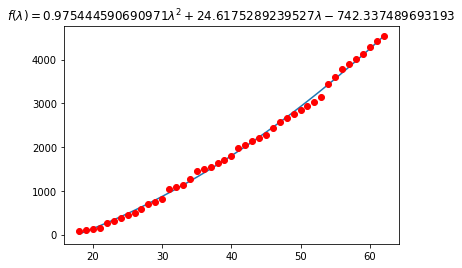

cubic_model
--- Predictions ---
|2020-05-02 | 4728|
|2020-05-03 | 4889|
|2020-05-04 | 5054|
|2020-05-05 | 5221|
|2020-05-06 | 5393|
|2020-05-07 | 5567|
|2020-05-08 | 5745|
|2020-05-09 | 5927|
|2020-05-10 | 6112|
|2020-05-11 | 6301|
|2020-05-12 | 6494|
|2020-05-13 | 6691|
|2020-05-14 | 6891|
|2020-05-15 | 7096|
|2020-05-16 | 7304|
|2020-05-17 | 7516|
|2020-05-18 | 7733|
|2020-05-19 | 7953|
|2020-05-20 | 8178|
|2020-05-21 | 8407|
|2020-05-22 | 8640|
|2020-05-23 | 8878|
|2020-05-24 | 9120|
|2020-05-25 | 9367|
|2020-05-26 | 9618|
|2020-05-27 | 9873|
|2020-05-28 | 10134|
|2020-05-29 | 10399|
|2020-05-30 | 10668|
|2020-05-31 | 10943|
-------------------


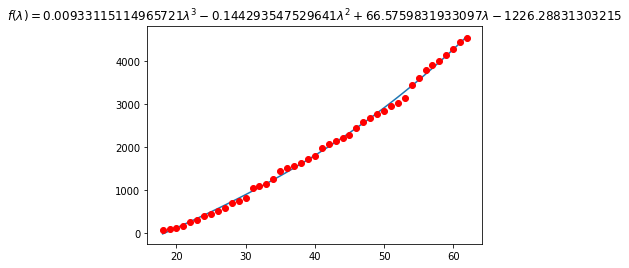

gauss_function
--- Predictions ---
|2020-05-02 | 0|
|2020-05-03 | 0|
|2020-05-04 | 0|
|2020-05-05 | 0|
|2020-05-06 | 0|
|2020-05-07 | 0|
|2020-05-08 | 0|
|2020-05-09 | 0|
|2020-05-10 | 0|
|2020-05-11 | 0|
|2020-05-12 | 0|
|2020-05-13 | 0|
|2020-05-14 | 0|
|2020-05-15 | 0|
|2020-05-16 | 0|
|2020-05-17 | 0|
|2020-05-18 | 0|
|2020-05-19 | 0|
|2020-05-20 | 0|
|2020-05-21 | 0|
|2020-05-22 | 0|
|2020-05-23 | 0|
|2020-05-24 | 0|
|2020-05-25 | 0|
|2020-05-26 | 0|
|2020-05-27 | 0|
|2020-05-28 | 0|
|2020-05-29 | 0|
|2020-05-30 | 0|
|2020-05-31 | 0|
-------------------

 gauss_function
a  =  1.0
x0  =  1.0
sigma  =  1.0


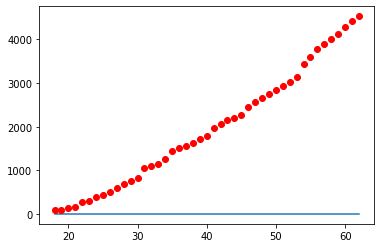

sin_model
--- Predictions ---
|2020-05-02 | 610|
|2020-05-03 | 1886|
|2020-05-04 | 2667|
|2020-05-05 | 2242|
|2020-05-06 | 998|
|2020-05-07 | 67|
|2020-05-08 | 295|
|2020-05-09 | 1476|
|2020-05-10 | 2535|
|2020-05-11 | 2508|
|2020-05-12 | 1420|
|2020-05-13 | 261|
|2020-05-14 | 85|
|2020-05-15 | 1052|
|2020-05-16 | 2283|
|2020-05-17 | 2657|
|2020-05-18 | 1835|
|2020-05-19 | 564|
|2020-05-20 | 1|
|2020-05-21 | 658|
|2020-05-22 | 1937|
|2020-05-23 | 2675|
|2020-05-24 | 2200|
|2020-05-25 | 944|
|2020-05-26 | 50|
|2020-05-27 | 331|
|2020-05-28 | 1532|
|2020-05-29 | 2559|
|2020-05-30 | 2480|
|2020-05-31 | 1365|
-------------------

 sin_model
a  =  2684.743825816892
b  =  -2.011525319909676


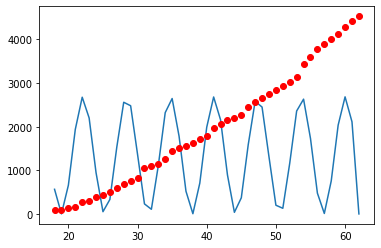

In [36]:
def isModel(methodName):
    return not(methodName.startswith('__'))

for methodName in dir(Models):
    if(isModel(methodName)):
        print(methodName)
        predictData(getattr(Models, methodName), data_argentina.tail(45).num_id, data_argentina.tail(45).TotalConfirmedCases)

In [37]:
def cuadratic_negative_model(x, a, b, c):
    return (-1 * (a**2) * x**2 + b*x +c)

In [38]:
data_argentina_filtered = data_argentina[data_argentina['num_id'] >=20]
data_argentina_filtered['num_id'] = np.arange(len(data_argentina_filtered) + 1)[1:]
data_argentina_filtered.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-20,128,31,3,0,1
2020-03-21,158,30,4,1,2
2020-03-22,266,108,4,0,3
2020-03-23,301,35,4,0,4
2020-03-24,387,86,6,2,5


--- Predictions ---
|2020-05-02 | 4752|
|2020-05-03 | 4920|
|2020-05-04 | 5094|
|2020-05-05 | 5271|
|2020-05-06 | 5453|
|2020-05-07 | 5640|
|2020-05-08 | 5831|
|2020-05-09 | 6027|
|2020-05-10 | 6229|
|2020-05-11 | 6435|
|2020-05-12 | 6646|
|2020-05-13 | 6862|
|2020-05-14 | 7084|
|2020-05-15 | 7312|
|2020-05-16 | 7544|
|2020-05-17 | 7783|
|2020-05-18 | 8027|
|2020-05-19 | 8277|
|2020-05-20 | 8534|
|2020-05-21 | 8796|
|2020-05-22 | 9064|
|2020-05-23 | 9339|
|2020-05-24 | 9620|
|2020-05-25 | 9907|
|2020-05-26 | 10202|
|2020-05-27 | 10502|
|2020-05-28 | 10810|
|2020-05-29 | 11125|
|2020-05-30 | 11446|
|2020-05-31 | 11775|
-------------------


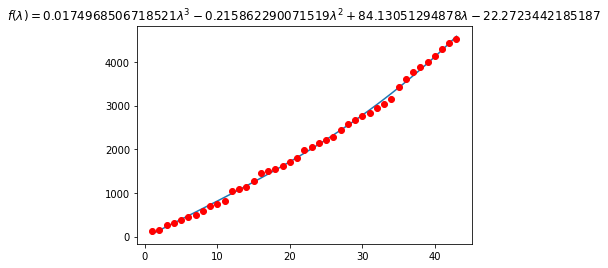

In [39]:
coff = predictData(Models.cubic_model, data_argentina_filtered.num_id, data_argentina_filtered.TotalConfirmedCases)

In [40]:
coff

array([ 1.74968507e-02, -2.15862290e-01,  8.41305129e+01, -2.22723442e+01])

In [41]:
x = range(1,365)

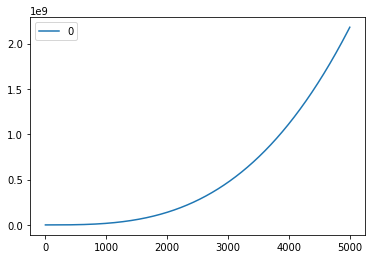

In [42]:
pd.DataFrame([(int(Models.cubic_model(x, *coff))) for x in range(1,5000)]).plot()